# **The flow to classify a chronic kidney disease**

In [1]:
import numpy as np #computations
import pandas as pd
import os, sys #system related settings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns # beautiful visualizations
sns.set()

In [2]:
df = pd.read_csv('/content/kidney_disease.csv')
df.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [3]:
df.shape

(400, 26)

In [4]:
# check for null
df.isnull().sum()

,0
id,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4


In [5]:
# Imputing Null values

from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed = pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns = df.columns
df_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
df_imputed.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


# **Finding unique values in the columns**

In [7]:
df_imputed.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [8]:
# helps to check for wrong values
for i in df_imputed.columns:
  print("***************************************************************************", i, "*************************************************************")
  print()
  print(set(df_imputed[i].tolist()))
  print()

*************************************************************************** id *************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 19

Getting wrongs: 'ckd\t', '\tno', ' yes', '\t43' and etc

For numerical: finding the mode values (the most common) to replace invalid values with.

In [9]:
print(df_imputed['rc'].mode())
print(df_imputed['wc'].mode())
print(df_imputed['pcv'].mode())


0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


For literals: checking for wrong values and replacing with correct ones.

In [10]:
# replacing
df_imputed['classification']=df_imputed['classification'].apply(lambda x: 'ckd' if x=='ckd\t' else x)

In [11]:
# replacing ...?
df_imputed['cad']=df_imputed['cad'].apply(lambda x: 'no' if x=='\tno' else x)

df_imputed['dm']=df_imputed['dm'].apply(lambda x: 'no' if x=='\tno' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x: 'yes' if x=='\tyes' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x: 'yes' if x==' yes' else x)

df_imputed['rc']=df_imputed['rc'].apply(lambda x: '5.2' if x=='\t?' else x)

df_imputed['wc']=df_imputed['wc'].apply(lambda x: '9800' if x=='\t6200' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x: '9800' if x=='\t8400' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x: '9800' if x=='\t?' else x)

df_imputed['pcv']=df_imputed['pcv'].apply(lambda x: '41' if x=='\t43' else x)
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x: '41' if x=='\t?' else x)

# **Checking label imbalance**

Axes(0.125,0.11;0.775x0.77)


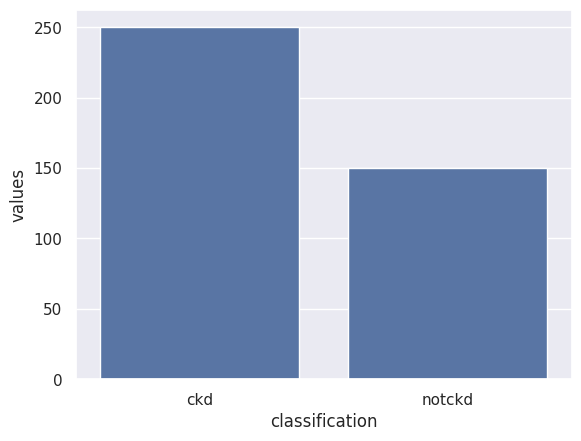

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

temp=df_imputed['classification'].value_counts()
temp_df=pd.DataFrame({'classification': temp.index, 'values': temp.values})
print(sns.barplot(x='classification', y='values', data=temp_df))

In [13]:
df.dtypes

,0
id,int64
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object


In [14]:
df_imputed.dtypes

,0
id,object
age,object
bp,object
sg,object
al,object
su,object
rbc,object
pc,object
pcc,object
ba,object


In [15]:
# helps to check for wrong values
for i in df_imputed.columns:
  print("***************************************************************************", i, "*************************************************************")
  print()
  print(set(df_imputed[i].tolist()))
  print()

*************************************************************************** id *************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 19

Big difference in values' amount. Needs to be fixed.

In [16]:
# fixing data types
# But! After imputing we lose the right meaning of data:
df_imputed.dtypes

,0
id,object
age,object
bp,object
sg,object
al,object
su,object
rbc,object
pc,object
pcc,object
ba,object


To fix this, from the main df exclude objects:

In [17]:
# exclude objects and keep only numericals
for i in df.select_dtypes(exclude=['object']).columns:
  df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

# **Visualisation**

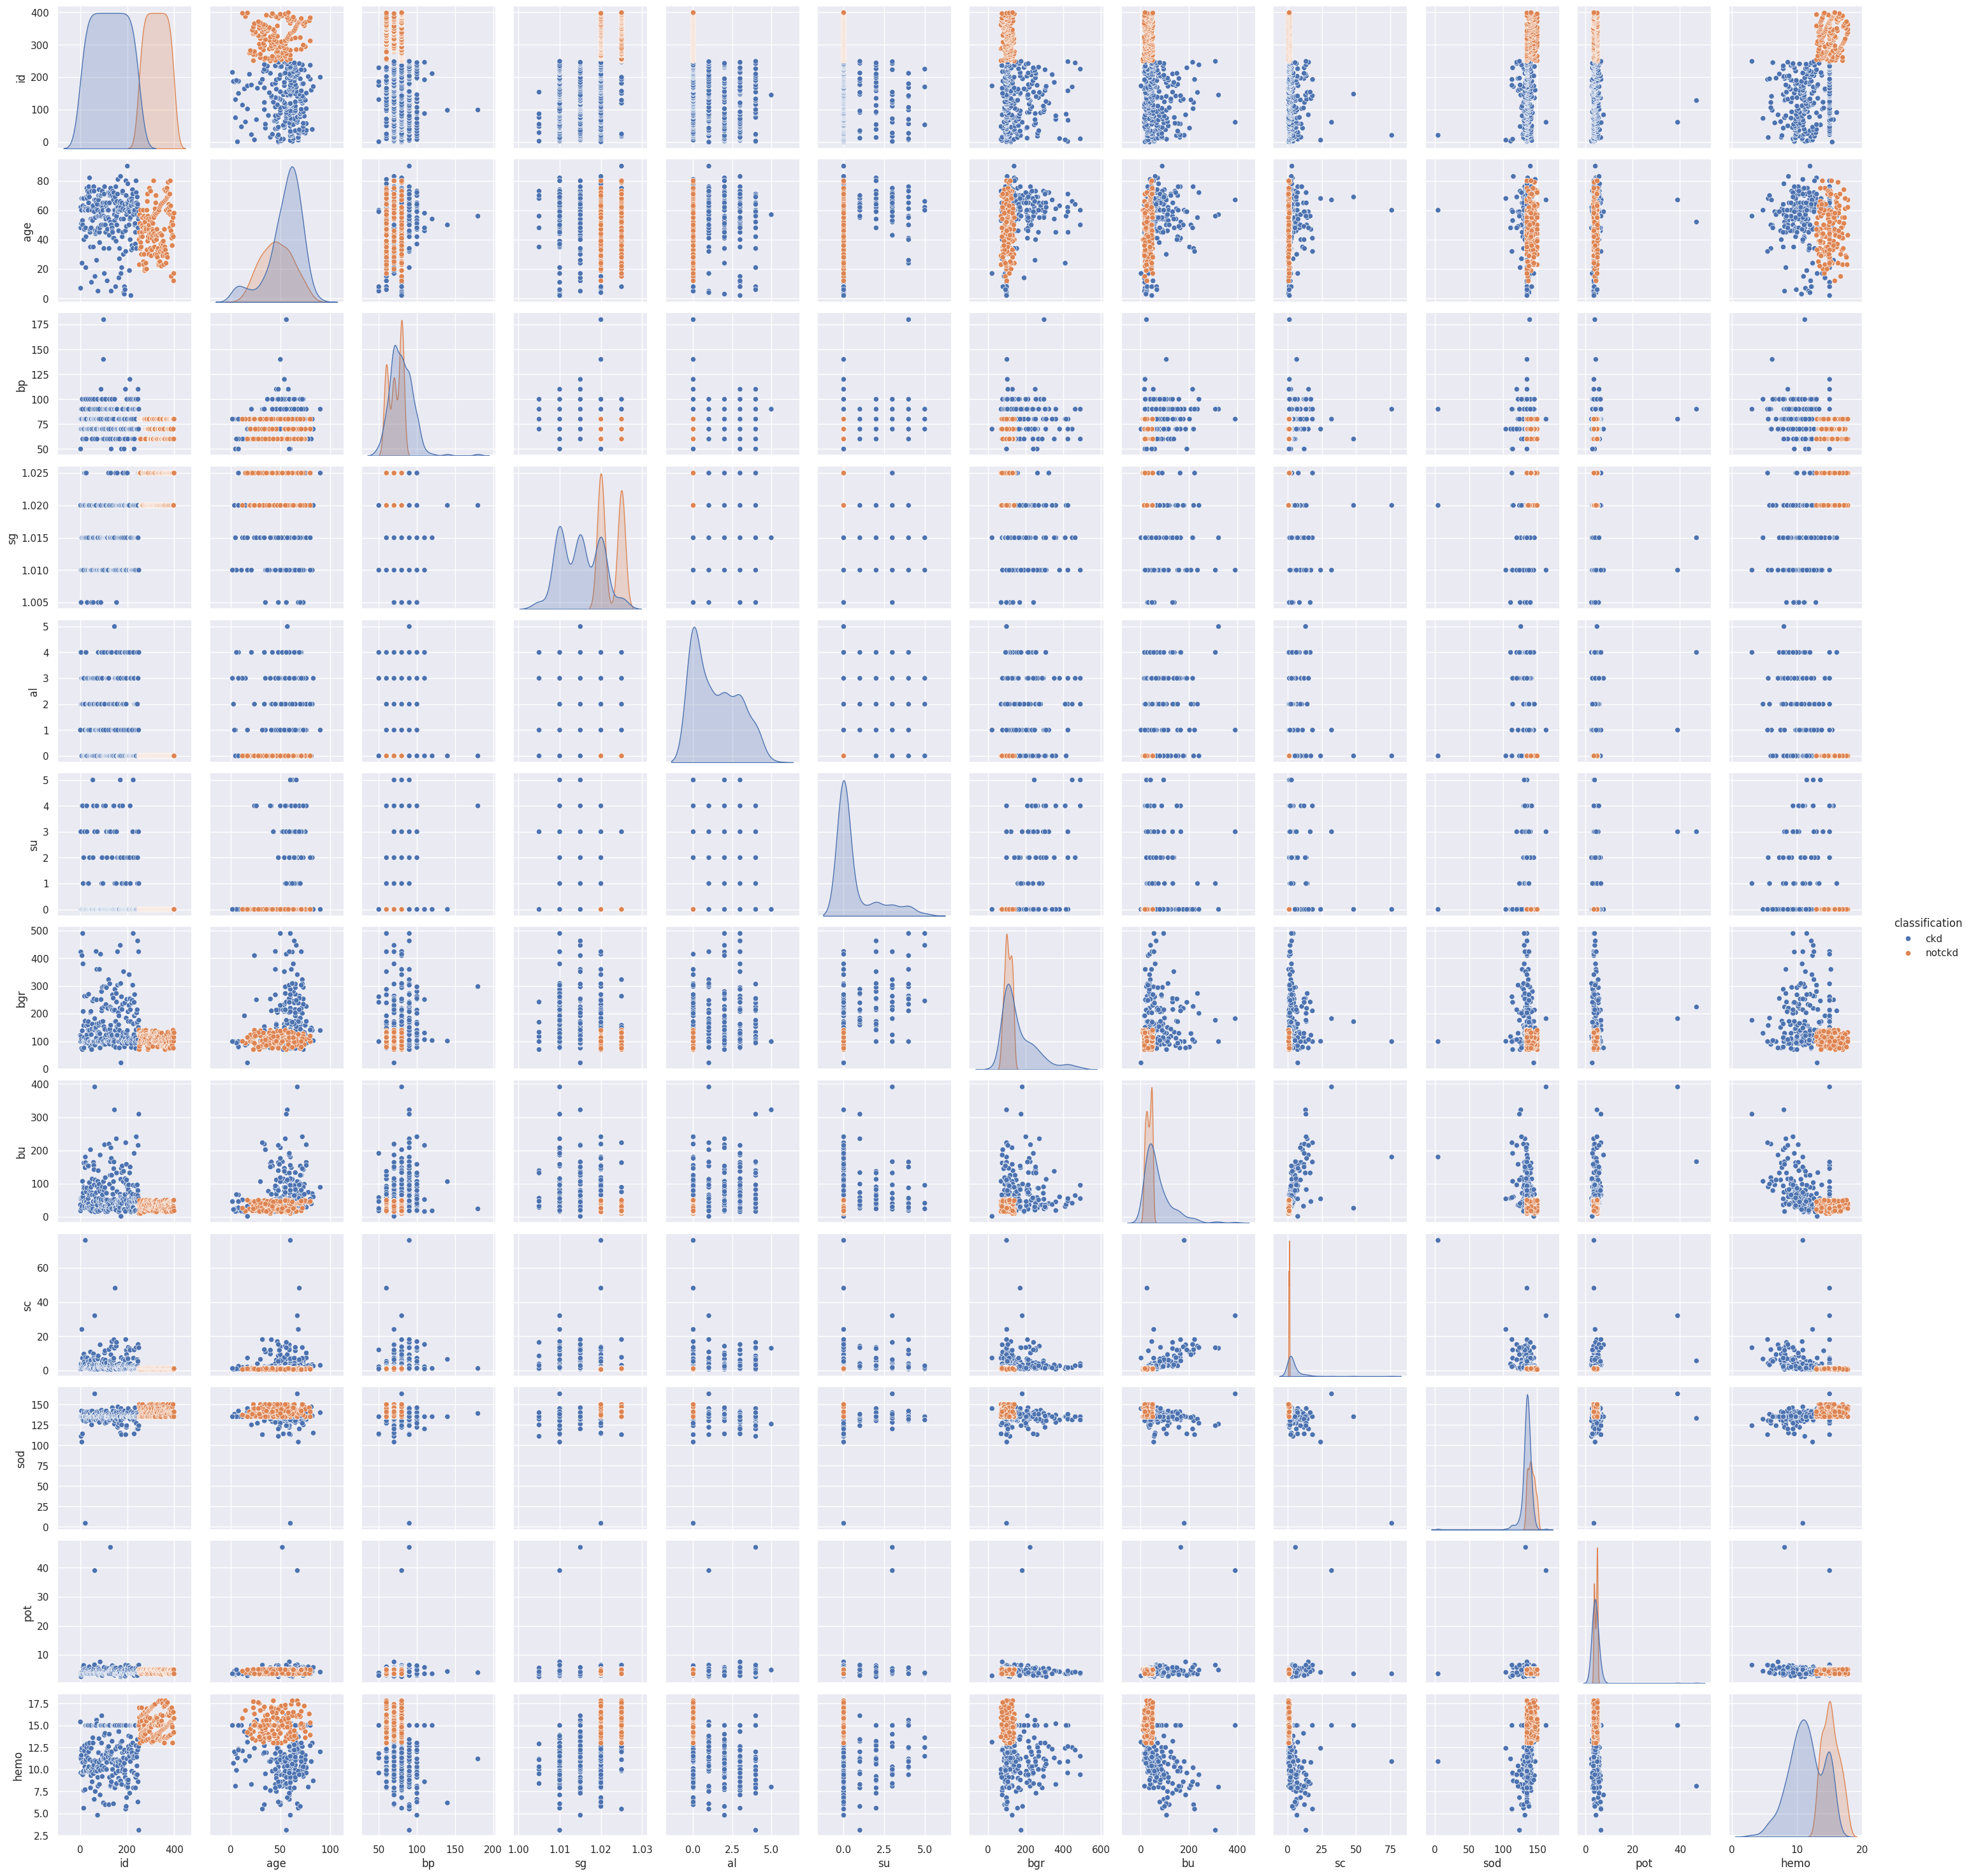

In [18]:
sns.pairplot(df_imputed, hue='classification')

Find the distribution of all numerical columns

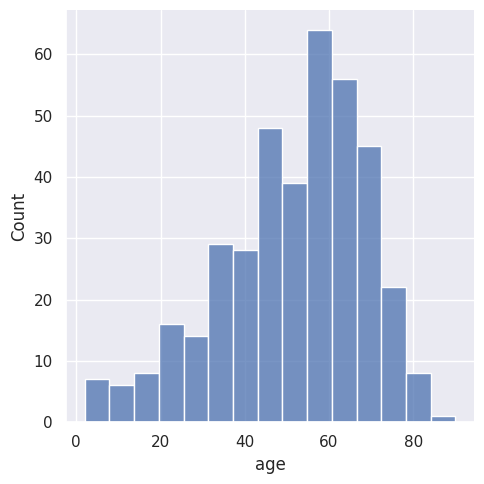

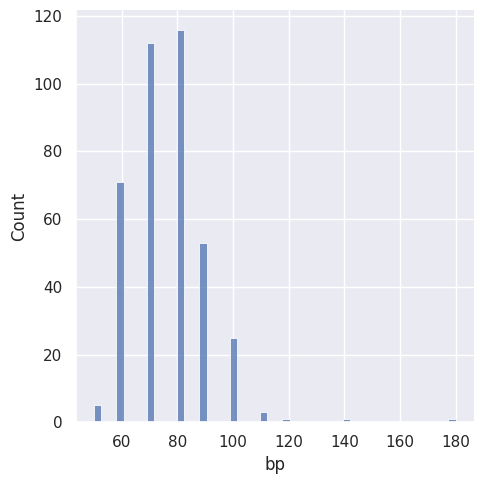

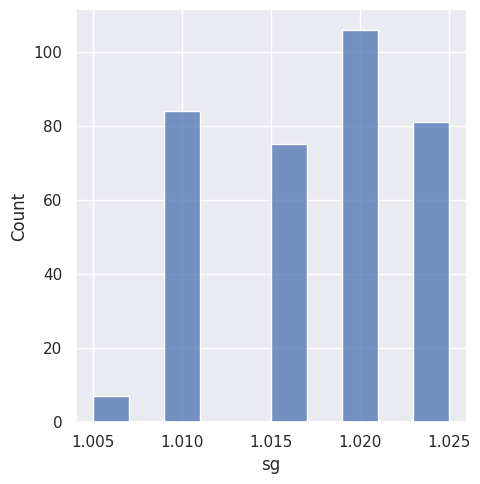

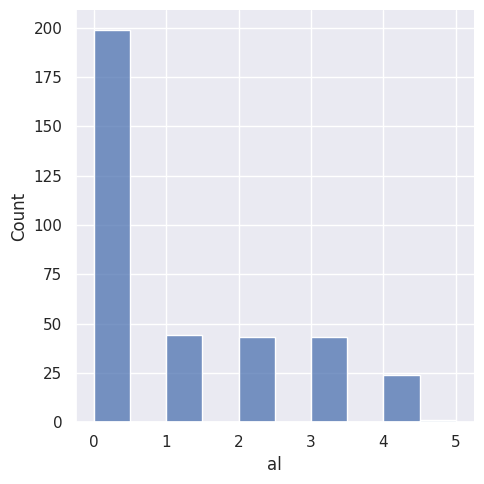

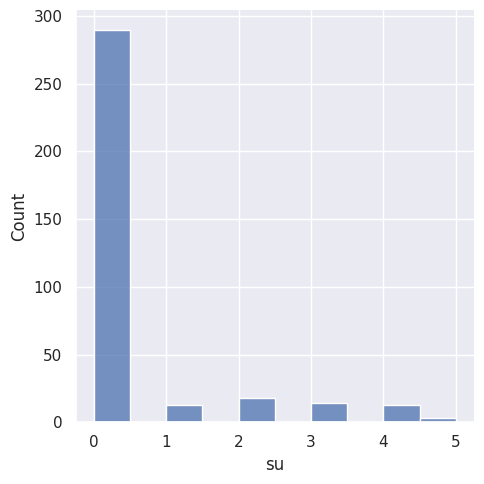

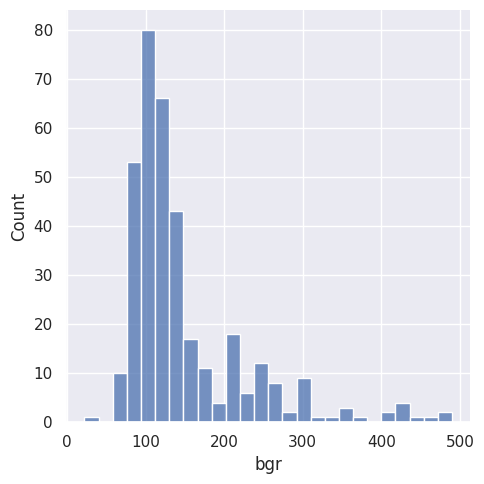

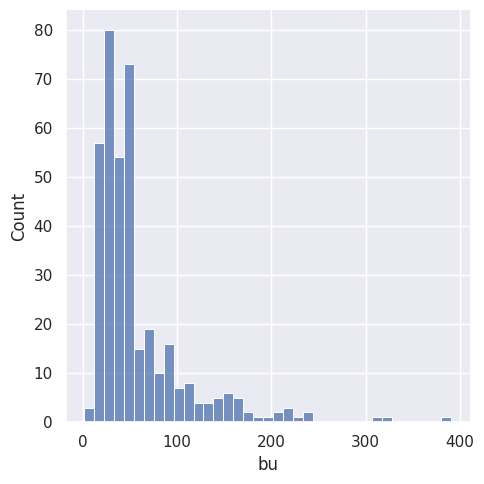

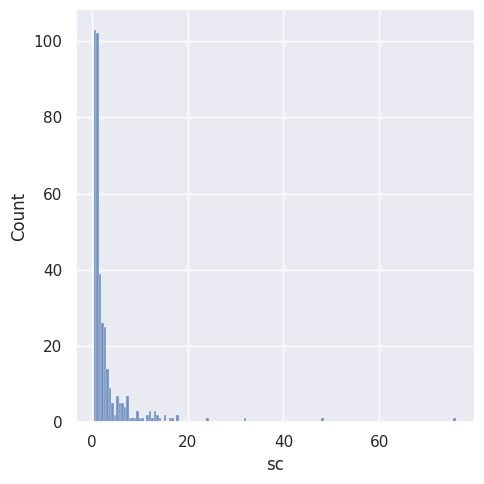

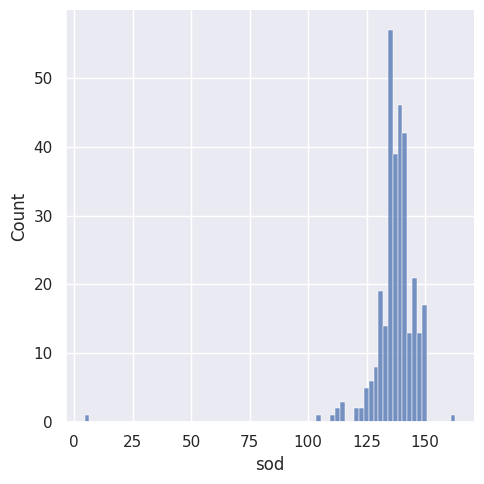

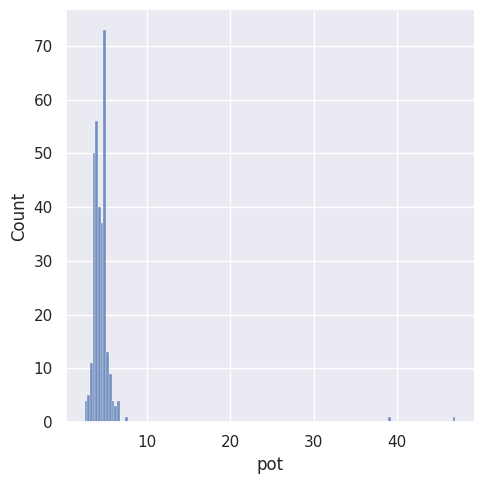

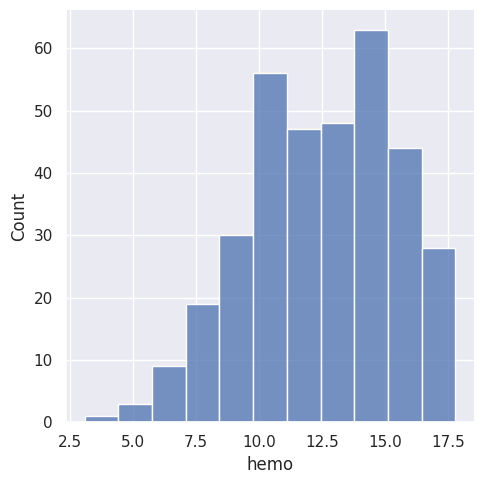

In [19]:
def displots(col):
  sns.displot(df[col])
  plt.show()

for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
  displots(i)

The data is mostly normally distributed

Outliers of data

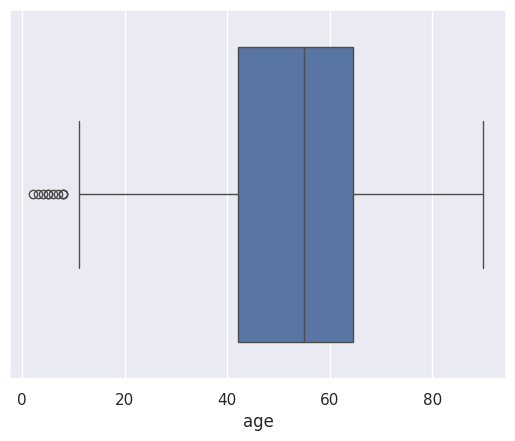

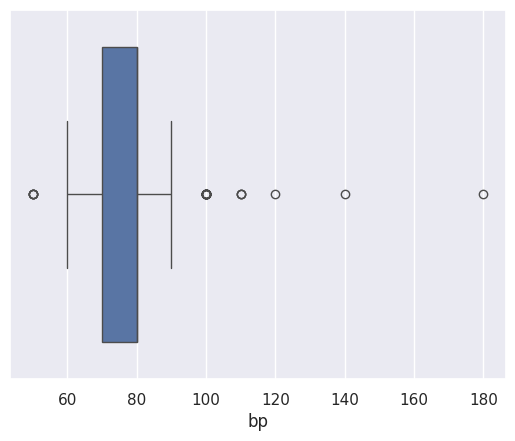

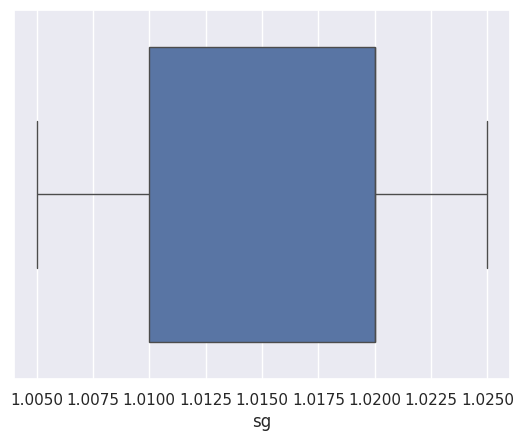

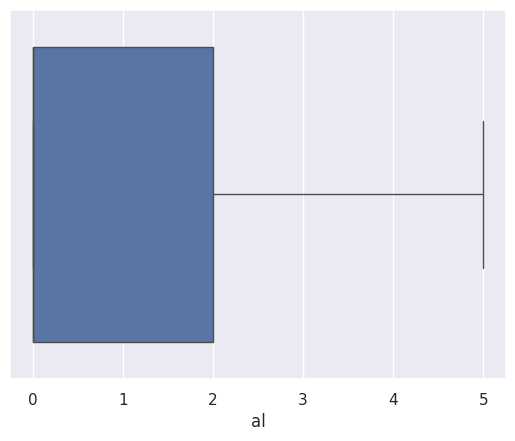

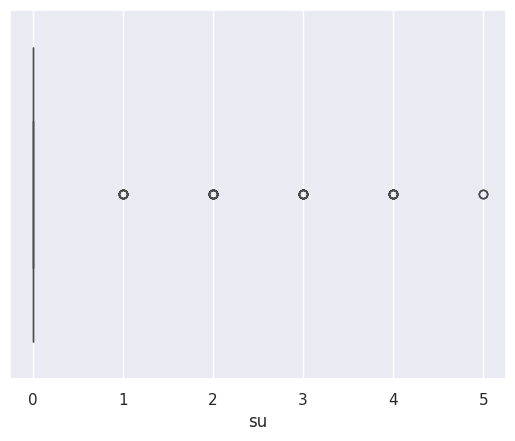

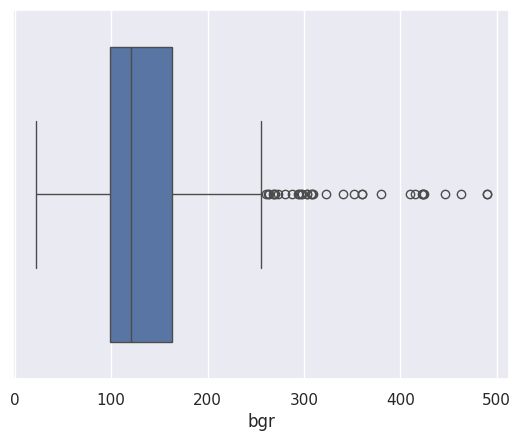

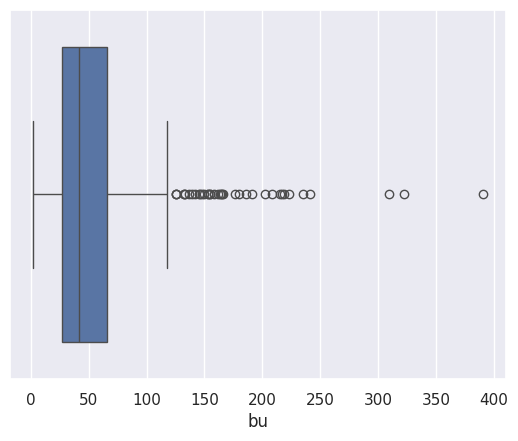

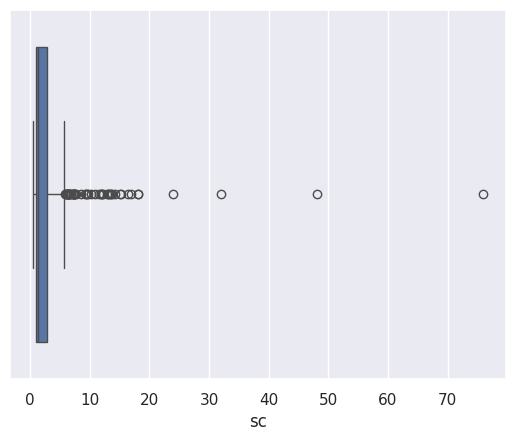

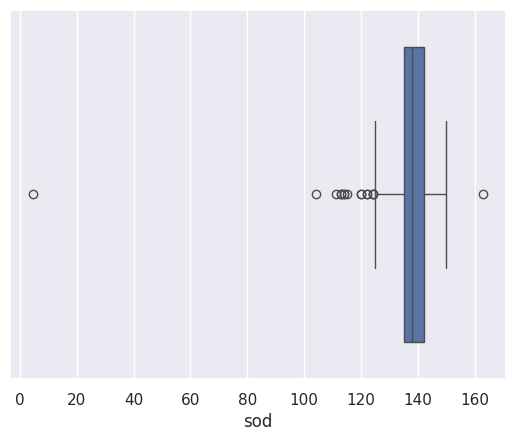

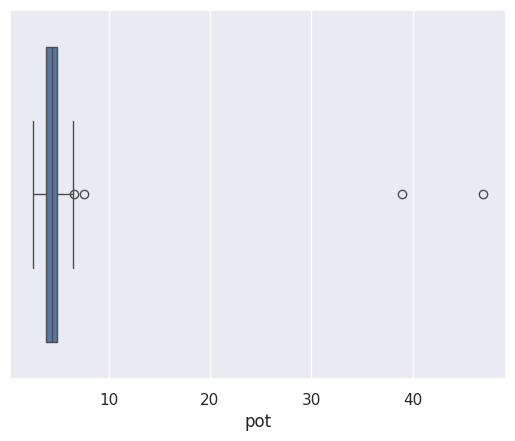

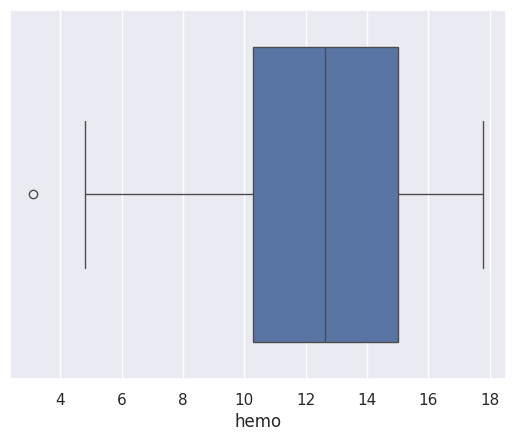

In [20]:
# Finding and remove outliers
def boxplots(col):
  # Ensures vertical orientation
  sns.boxplot(x=df[col])
  plt.show()

for i in list(df_imputed.select_dtypes(exclude=['object']).columns)[1:]:
  boxplots(i)

The outliers seen here are actually possible values. Have seen it with medical professionals

Final step of the data preprocessing is label encoding (tp convert categorical data into numerical).
Encode the data is needed because there are categorical and numerical columns, but algorytms expect only numerical input. Many ways of this are available. Currently label encoding is used.

In [21]:
# Label encoding to convert categorical values to numerical
from sklearn import preprocessing

df_encoded=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_encoded

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,1,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,0,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,1,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,0,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,0,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,0,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,0,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,0,0,0,0,0,1


Save the preprocessed data

In [22]:
df_encoded.to_csv('Kidney_Disease_Pre-processed_Data.csv')

# **Correlation**

Finding correlation between independent variables important, becasue we dont want to fit the wrong data to a model. If there is such a corellation, the value of the weight would be altered, and the output would not be right.

<Axes: >

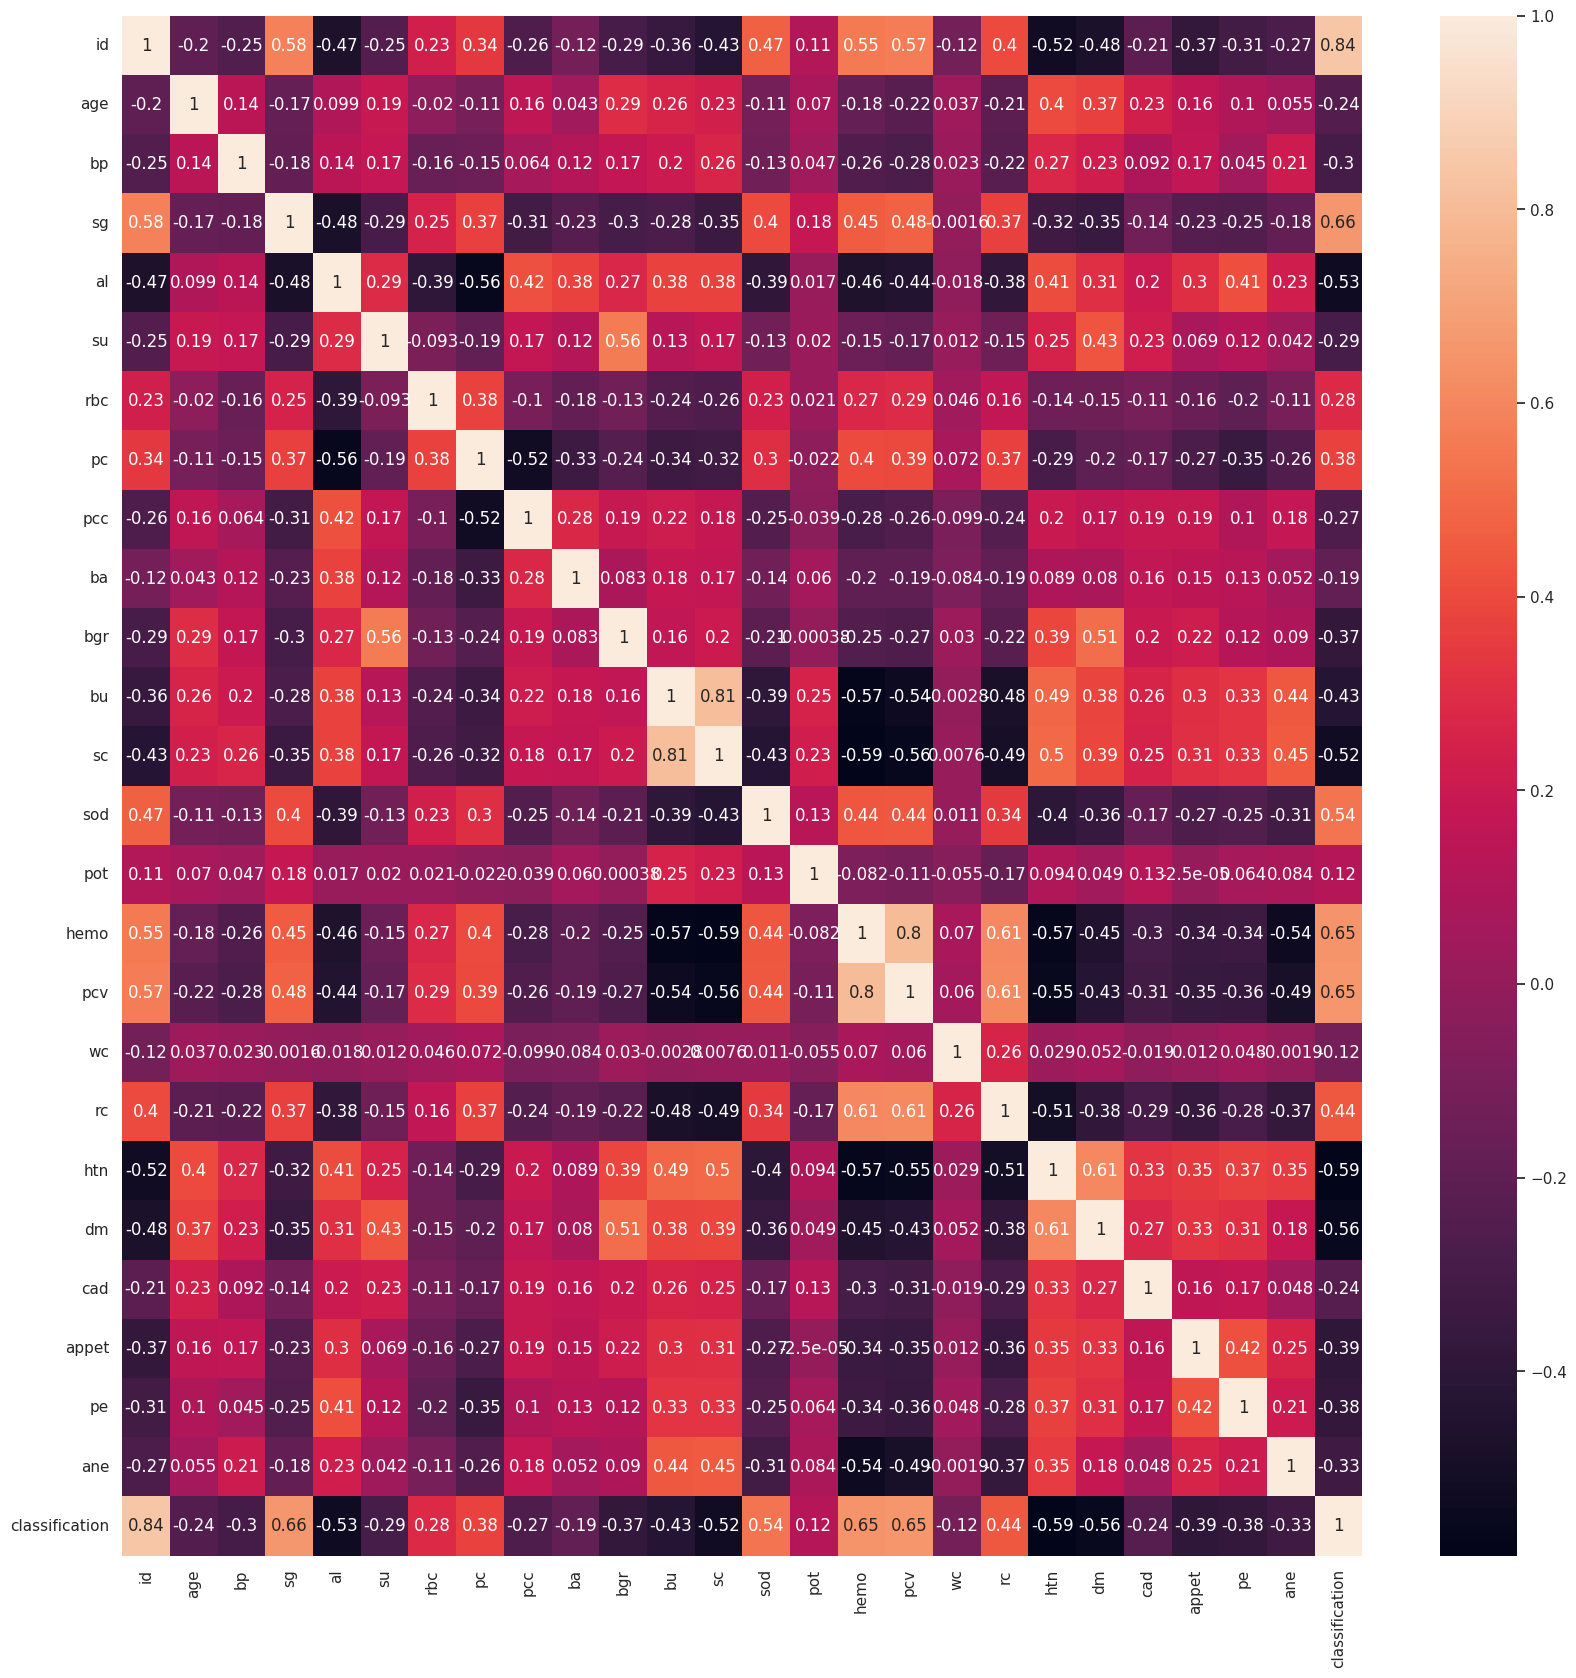

In [23]:
# Find correlation

plt.figure(figsize=(20,20))
corr=df_encoded.corr()
sns.heatmap(corr, annot=True)

In [24]:
# Separate independent and dependent variables and drop the ID col.
x=df_encoded.drop(['id', 'classification'], axis=1)
y=df_encoded['classification'] # dependent

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [26]:
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


# **Scaling**


Scaling is especially important in the algorytms where the distace between the data point is important, such as SVM and KNN

In [27]:
# Initializing MinMaxScaler and scale the features to between -1 and 1 to normalize them.
scaler=MinMaxScaler(feature_range=(-1,1))
# the fit_transform() method fits to the data and then transforms it. No need to scale labels
x=scaler.fit_transform(x_ros)
y=y_ros

# **Feature extraction or dimensionality reduction**

Reduce the dimensionallity of the independent variables.

In [29]:
# Applying PCA

# The code below has .95 for the number of components parameter.
# It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

# Thus we need 18 columns to keep 95% of the variance

(500, 24)
(500, 18)


In [31]:
# with PCA
# spliting the data into training and testing datasets keeping 20% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=7)

# **Creating neural network**
(and then fitting the data)

In [37]:
%pip install tensorflow

In [39]:
import tensorflow.keras

# A Sequential model is appropriate for a plane stack of layers, where each layer has exactly one input tensor and one output tensor. Straight up connection between layers. No feedback and etc comming back from those layers.
from keras.models import Sequential

# Dense layer is the regular deeply connected neural network layer. Most common and used.. No feedback as well.
from keras.layers import Dense

# the Droput layer randomly sets input units to 0 with a frequency of rate at each step during trainig time, which helps prevent overfitting
from keras.layers import Dropout

# saves a certain point of a trained model to continue witj
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model

# Optimizers are algoritms or methods used to change the attributes of the NN sich as weight and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimazing the function.
# Adam optimization is an extension to ''Stochastic gradient descend'' and can be used in place of classical stochastic gradient descent to update network weights more efficiently.
from keras.optimizers import Adam
from sklearn.model_selection import KFold # not used here since no Rule-based algoritms


In [47]:
# creating the model

def model():
  # architecture:
  classifier = Sequential()
            # depth - randomly chosen:    # number of input neurons:     # gives only +outputs or 0:
  classifier.add(Dense(15, input_shape = (x_train.shape[1],), activation = 'relu'))
  classifier.add(Dropout(0.2)) # carring 80% of neurons to the next layer
  classifier.add(Dense(15, activation = 'relu')) # the rectified linear activation function or ReLu for short is a
  classifier.add(Dropout(0.4)) # taking 60% of neurons from this to the next layer

  # since this is a binary classification, the final depth should be 1.
  # the main reason wjy we use sigmoid function is because it exists betwenn (0 to 1)
  classifier.add(Dense(1, activation = 'sigmoid'))
  classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return classifier

In [41]:
# get the shape of the tensor
x_train.shape[1] # <-- the number of input neurons

18

In [50]:
# include bias:
(x_train.shape[1]+1)*15 # <-- the number of input neurons

285

In [48]:
model = model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 15)                  │             285 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# Fit the training data into the model

# When adding validation_data to a model - it would
# train with every epoch on the train data and
# test with the validation data.
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=5,
    verbose=1
)


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.4760 - loss: 0.7591 - val_accuracy: 0.6100 - val_loss: 0.6978
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5882 - loss: 0.7167 - val_accuracy: 0.7700 - val_loss: 0.6572
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6766 - loss: 0.6637 - val_accuracy: 0.8300 - val_loss: 0.6216
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7015 - loss: 0.6262 - val_accuracy: 0.8800 - val_loss: 0.5859
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7647 - loss: 0.5912 - val_accuracy: 0.9000 - val_loss: 0.5501


Meaning:
- if val_accuracy increasing at every step, is the loss decreasing.
- if the accuracy really is increasing, is the validation accuracy also increasing? If this is not happening, the accuracy keeps on increasing, but the validation accuracy keeps on decreasing --> then this is highter variance in the model, the model is overfitting. So stop training and reset the model and change layers or alterations in the model, and check how well the data was pre-processed.

# **Evaluate the model**

In [57]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score, confusion_matrix

# function to plot the roc_curve
def plot_auc(t_y, p_y):
  fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
  fig, c_ax = plt.subplots(1,1, figsize = (9,9))
  c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)' %('classification', auc(fpr, tpr)))
  c_ax.plot([0,1],[0,1], color='navy', lw=1, linestyle='--')
  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')

# function to plot  the precision_recall_curve. Utilized precision_recall_curve imported above
def plot_precision_recall_curve_helper(t_y, p_y):
  fig, c_ax = plt.subplots(1,1, figsize = (9,9))
  precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
  aps = average_precision_score(t_y, p_y)
  c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)' %('classification', aps))
  c_ax.plot(recall, precision, color='red', lw=2)
  c_ax.legend()
  c_ax.set_xlabel('Recall')
  c_ax.set_ylabel('Precision')

# function to plot the history
def plot_history(history):
  f = plt.figure()
  f.set_figwidth(15)

  f.add_subplot(1,2,1)
  plt.plot(history.history['val_loss'], label='val loss')
  plt.plot(history.history['loss'], label='train loss')
  plt.legend()
  plt.title('model loss')

  f.add_subplot(1,2,2)
  plt.plot(history.history['val_accuracy'], label='val accuracy')
  plt.plot(history.history['accuracy'], label='train aaccuracycc')
  plt.legend()

  plt.show()

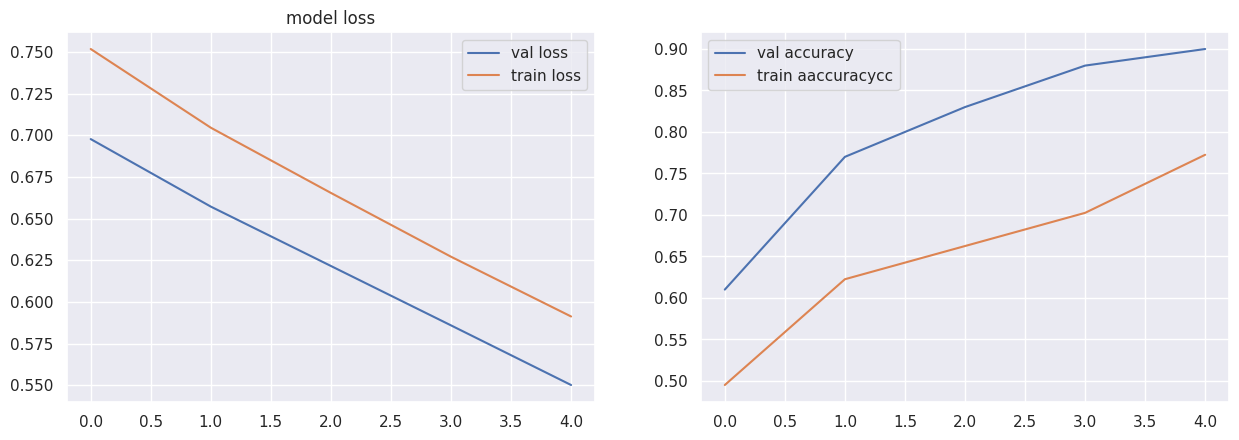

In [58]:
hist = plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


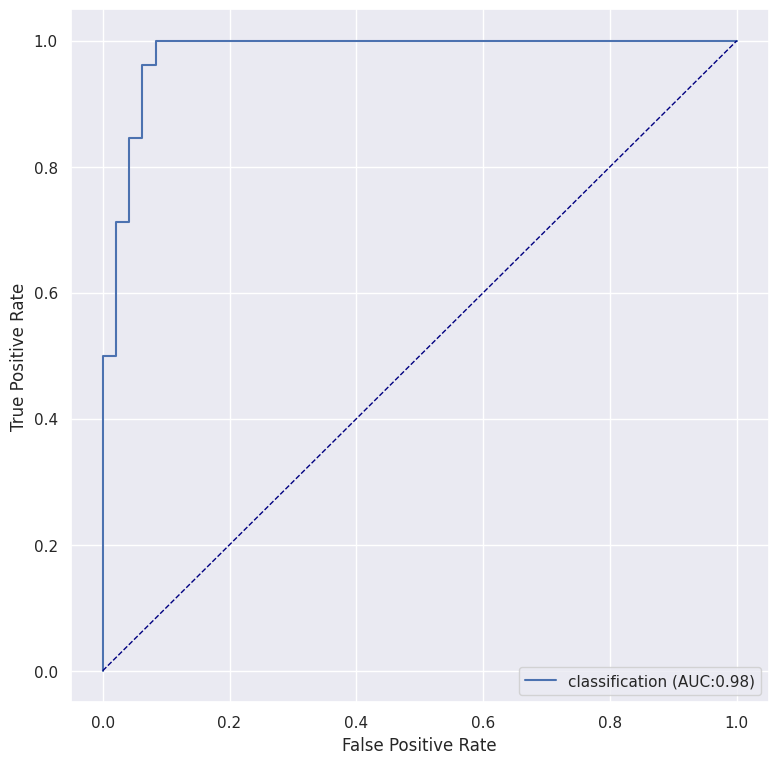

In [59]:
plot_auc(y_test, model.predict(x_test, verbose = True))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


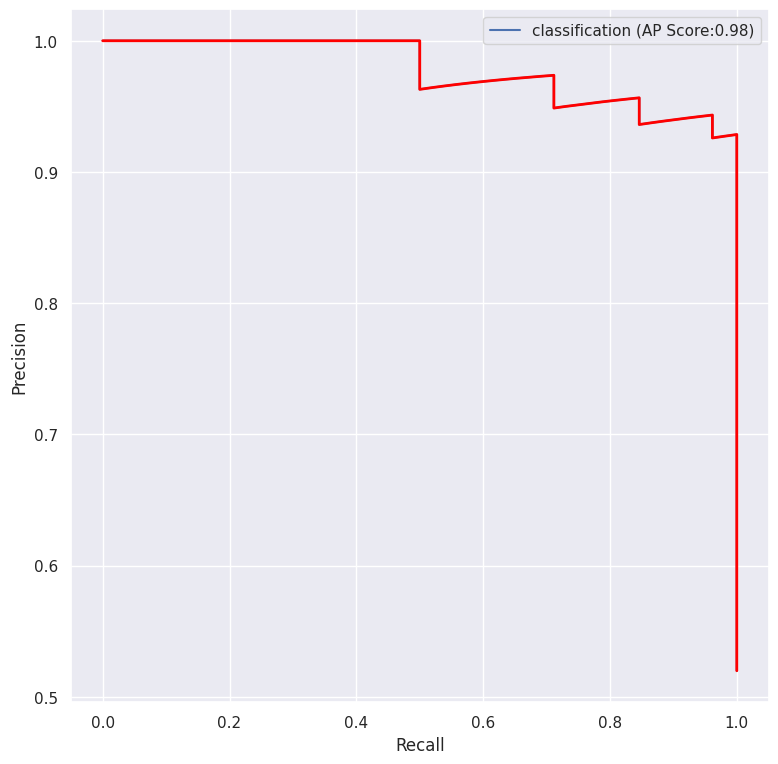

In [60]:
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose = True))

Calculate f1 - score:

In [61]:
# Find the treshold that optimize the model's performance, and use that threshold to make binary classification.
# Consider all the metrics

def calc_f1(prec, recall):
  return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose = True))
f1_score = [calc_f1(precision[i], recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1_score)
threshold = thresholds[idx]
print('**************************************************************')
print('Precision: ' + str(precision[idx]))
print('Recall: ' + str(recall[idx]))
print('Threshold: ' + str(threshold))
print('F1 Score: ' + str(f1_score[idx]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
**************************************************************
Precision: 0.9285714285714286
Recall: 1.0
Threshold: 0.54333043
F1 Score: 0.962962962962963


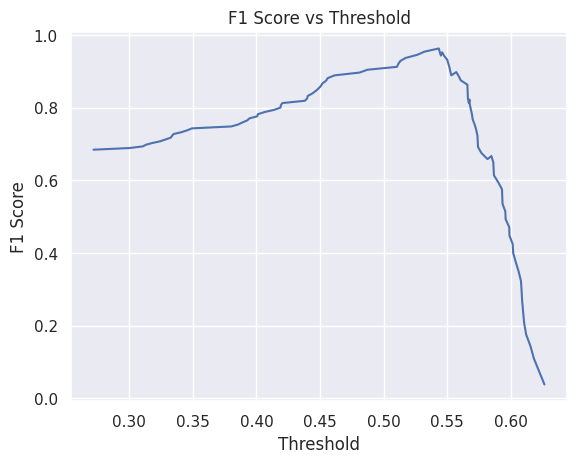

In [62]:
# the threshold or Cut-off represents in a binary classification the probability thta the prediction is true.
# It represents the
plt.figure()
plt.plot(thresholds, f1_score)
plt.title('F1 Score vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.show()